In [41]:
import pandas as pd # pandas k nacitani dat z excelu
import numpy as np # numpy pro vypocty
import matplotlib.pyplot as plt # vykreslovani grafu
from scipy import signal 
from decimal import Decimal # zaokrouhlovani na jednu platnou cifru
import math
from sympy.solvers import solve
from scipy import optimize
from sympy import Symbol

In [42]:
sample_a = pd.read_csv("samples/sample_a.txt", skiprows=1) #a: rubínový krystal
sample_b = pd.read_csv("samples/sample_b.txt", skiprows=1) #b: dielektrický úzkopásmový filtr pro rubínový laser
sample_c = pd.read_csv("samples/sample_c.txt", skiprows=1) # zrcadlo pro rubínový laser
sample_d = pd.read_csv("samples/sample_d.txt", skiprows=1) # filtr RG7 (horní propust 700 nm)
sample_e = pd.read_csv("samples/sample_e.txt", skiprows=1) # zrcadlo pro Nd:YAG laser
sample_f = pd.read_csv("samples/sample_f.txt", skiprows=1) # ochranné brýlové sklo pro práci s Nd:YAG laserem
sample_g = pd.read_csv("samples/sample_g.txt", skiprows=1) # infračervený filtr (horní propust 600 nm)
sample_h = pd.read_csv("samples/sample_h.txt", skiprows=1) # křemíková destička
sample_i = pd.read_csv("samples/sample_i.txt", skiprows=1) # sklo z černých brýlí
sample_bily = pd.read_csv("samples/sample_bily.txt", skiprows=1) # Er:sklo
sample_modry = pd.read_csv("samples/sample_modry.txt", skiprows=1) # Nd:YVO4
sample_cerveny = pd.read_csv("samples/sample_cerveny.txt", skiprows=1) # Cr:YAG

Naměřená transmisní spektra

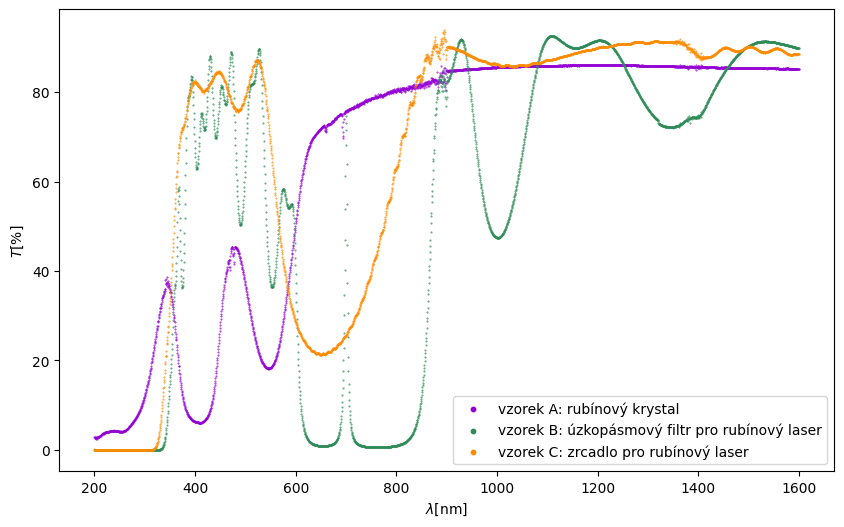

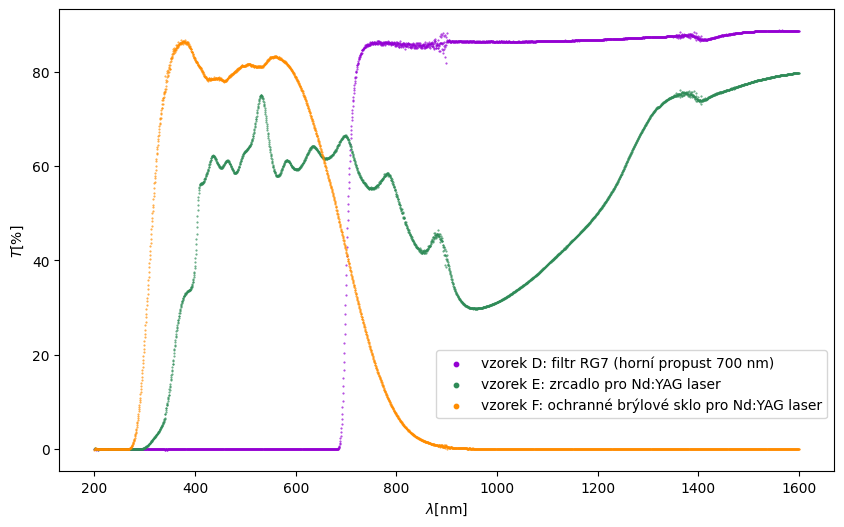

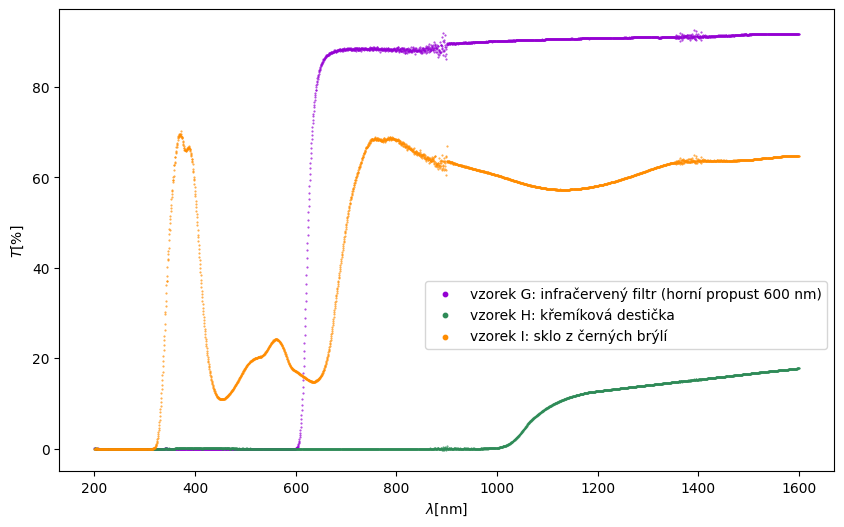

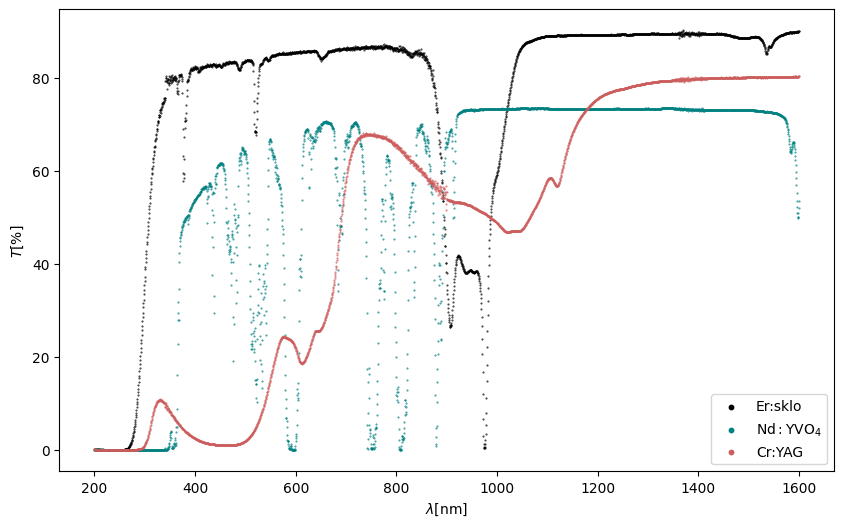

In [43]:
samples_abc = [sample_a, sample_b, sample_c]
samples_def = [sample_d, sample_e, sample_f]
samples_ghi = [sample_g, sample_h, sample_i]
samples_krystaly = [sample_bily, sample_modry, sample_cerveny]

colors = ["darkviolet", "seagreen", "darkorange"]
colors_krystaly = ["black", "teal", "indianred"]

labels_abc = ["vzorek A: rubínový krystal", 
              "vzorek B: úzkopásmový filtr pro rubínový laser", 
              "vzorek C: zrcadlo pro rubínový laser"]
labels_def = ["vzorek D: filtr RG7 (horní propust 700 nm)", 
              "vzorek E: zrcadlo pro Nd:YAG laser", 
              "vzorek F: ochranné brýlové sklo pro Nd:YAG laser"]
labels_ghi = ["vzorek G: infračervený filtr (horní propust 600 nm)",
              "vzorek H: křemíková destička",
              "vzorek I: sklo z černých brýlí"]
labels_krystaly = ["Er:sklo", "$\\mathrm{{Nd:YVO_4}}$", "Cr:YAG"]



fig_samples_abc = plt.figure(figsize = (10, 6))
for i in range(3):
    plt.scatter(samples_abc[i]["Wavelength nm."], samples_abc[i]["T%"], 
                color=colors[i], 
                marker=".", s=1, alpha=0.8,
                label=labels_abc[i])
lgnd = plt.legend(scatterpoints=1, fontsize=10)
for handle in lgnd.legend_handles:
    handle.set_sizes([40])
    handle.set_alpha(1)
plt.xlabel('$\\lambda\\mathrm{[nm]}$ ', fontsize = 10)
plt.ylabel("$T\\mathrm{[\\%]}$", fontsize = 10)
plt.savefig("../protokol_05/img/samples_abc.pdf")
plt.show()

fig_samples_def = plt.figure(figsize = (10, 6))
for i in range(3):
    plt.scatter(samples_def[i]["Wavelength nm."], samples_def[i]["T%"], 
                color=colors[i], 
                marker=".", s=1, alpha=0.8,
                label=labels_def[i])
lgnd = plt.legend(scatterpoints=1, fontsize=10, loc="lower right", bbox_to_anchor=(1, 0.1))
for handle in lgnd.legend_handles:
    handle.set_sizes([40])
    handle.set_alpha(1)
plt.xlabel('$\\lambda\\mathrm{[nm]}$ ', fontsize = 10)
plt.ylabel("$T\\mathrm{[\\%]}$", fontsize = 10)
plt.savefig("../protokol_05/img/samples_def.pdf")
plt.show()

fig_samples_ghi = plt.figure(figsize = (10, 6))
for i in range(3):
    plt.scatter(samples_ghi[i]["Wavelength nm."], samples_ghi[i]["T%"], 
                color=colors[i], 
                marker=".", s=1, alpha=0.8,
                label=labels_ghi[i])
lgnd = plt.legend(scatterpoints=1, fontsize=10, loc="lower right", bbox_to_anchor=(1, 0.25))
for handle in lgnd.legend_handles:
    handle.set_sizes([40])
    handle.set_alpha(1)
plt.xlabel('$\\lambda\\mathrm{[nm]}$ ', fontsize = 10)
plt.ylabel("$T\\mathrm{[\\%]}$", fontsize = 10)
plt.savefig("../protokol_05/img/samples_ghi.pdf")
plt.show()

fig_samples_krystaly = plt.figure(figsize = (10, 6))
for i in range(3):
    plt.scatter(samples_krystaly[i]["Wavelength nm."], samples_krystaly[i]["T%"], 
                color=colors_krystaly[i], 
                marker=".", s=1, alpha=0.8,
                label=labels_krystaly[i])
lgnd = plt.legend(scatterpoints=1, fontsize=10, loc="lower right", bbox_to_anchor=(1, 0))
for handle in lgnd.legend_handles:
    handle.set_sizes([40])
    handle.set_alpha(1)
plt.xlabel('$\\lambda\\mathrm{[nm]}$ ', fontsize = 10)
plt.ylabel("$T\\mathrm{[\\%]}$", fontsize = 10)
plt.savefig("../protokol_05/img/samples_krystaly.pdf")
plt.show()


Dielektrický úzkopásmový filtr pro rubínový laser
* Změřte šířku transmisního pásu ∆λ pro rubínový laser.
* Zjistěte vlnovou délku pro maximální hodnotu transmitance λmax pro rubínový
laser.

sirka peaku = [11.25145746]
vyska peaku = [72.768]
1000    700.0
Name: Wavelength nm., dtype: float64


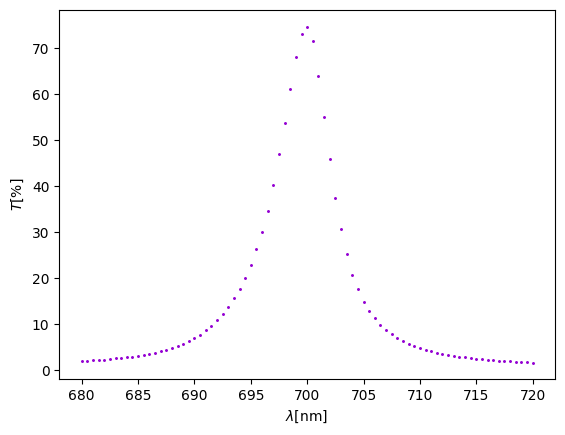

In [44]:
peak_filtr_rubin = sample_b[sample_b["Wavelength nm."].between(680, 720)]
peak, _ = signal.find_peaks(peak_filtr_rubin["T%"])
fwhm_filtr_rubin = signal.peak_widths(peak_filtr_rubin["T%"], peak, rel_height=0.5)
vyska_peak_rubin = signal.peak_prominences(peak_filtr_rubin["T%"], peak)
print(f"sirka peaku = {fwhm_filtr_rubin[0]}")
print(f"vyska peaku = {vyska_peak_rubin[0]}")
print(peak_filtr_rubin["Wavelength nm."].iloc[[40]])

fig_peak_filtr_rubin = plt.figure()

plt.scatter(peak_filtr_rubin["Wavelength nm."], peak_filtr_rubin["T%"], 
            color="darkviolet", 
            marker=".", s=5, alpha=1)


#lgnd = plt.legend(scatterpoints=1, fontsize=10)
#for handle in lgnd.legend_handles:
#    handle.set_sizes([40])
#    handle.set_alpha(1)

plt.xlabel('$\\lambda\\mathrm{[nm]}$ ', fontsize = 10)
plt.ylabel("$T\\mathrm{[\\%]}$", fontsize = 10)

plt.savefig("../protokol_05/img/peak_filtr_rubin.pdf")
plt.show()


Filtr RG7
* Zjistěte vlnovou délku λ1/2, pro kterou je transmitance rovna T = 0,5.

      Wavelength nm.      T%
1007           703.5  50.416


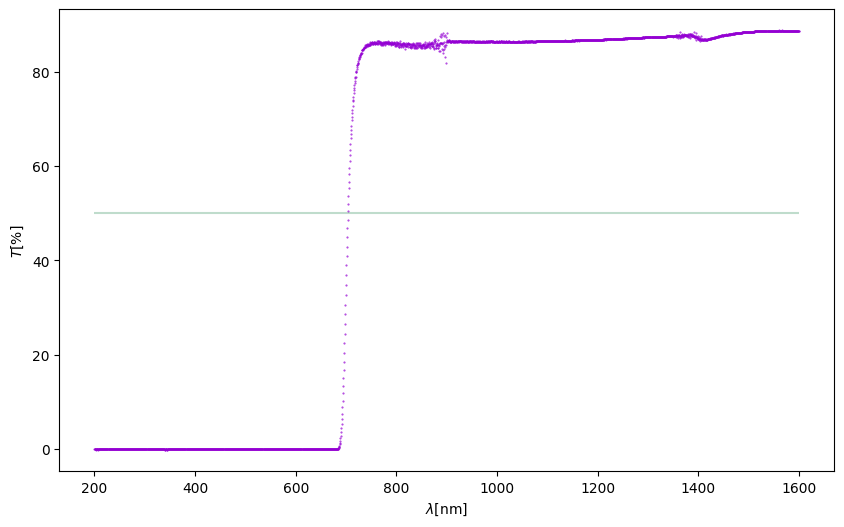

In [45]:
print(sample_d[sample_d["T%"].between(49, 51)])
fig_RG7 = plt.figure(figsize = (10, 6))

plt.scatter(sample_d["Wavelength nm."], sample_d["T%"], 
            color="darkviolet", 
            marker=".", s=1, alpha=0.8,)
plt.hlines(y=50, xmin=200, xmax=1600, colors="seagreen", alpha=0.3)
#lgnd = plt.legend(scatterpoints=1, fontsize=10, loc="lower right", bbox_to_anchor=(1, 0.1))
#for handle in lgnd.legend_handles:
#    handle.set_sizes([40])
#    handle.set_alpha(1)
plt.xlabel('$\\lambda\\mathrm{[nm]}$ ', fontsize = 10)
plt.ylabel("$T\\mathrm{[\\%]}$", fontsize = 10)
plt.show()

Rubínový krystal
* Určete polohu všech maxim absorpce λmax a šířky jednotlivých absorpčních pásů ∆λ.
* Spočtěte koeficienty interní absorpce α (při výpočtu nejprve odečtěte
Fresnelovské ztráty na čelech krystalu, které jsou dány indexem lomu materiálu).
* Rozhodněte, zda se jedná o 3- nebo 4- hladinový energetický systém.
* Zdůvodněte lokální absorpční maximum na vlnové délce 694 nm.

420    410.0
691    545.5
986    693.0
Name: Wavelength nm., dtype: float64
sirka peaku = [162.36112546 142.28899362   1.83403988]
vyska peaku = [32.541 27.29   5.539]


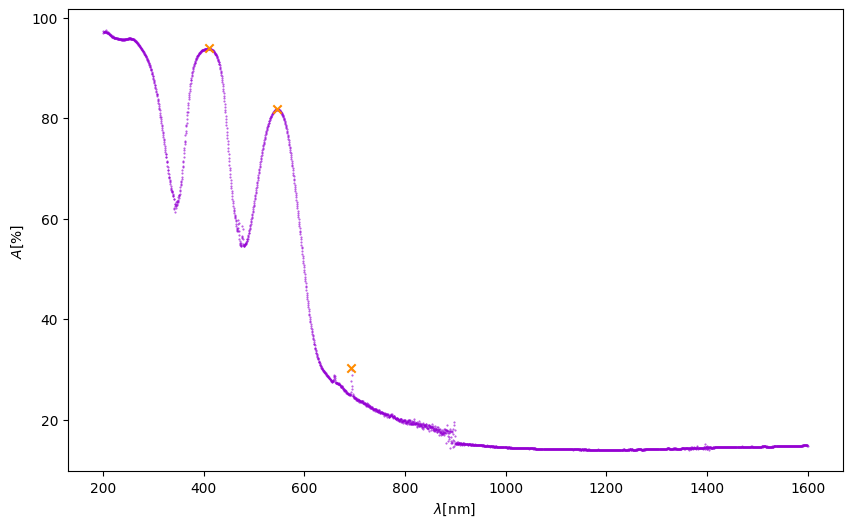

2.4700164629589225
1.5009402671209073
0.31841214892442754


/tmp/ipykernel_12853/4159483604.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  a = - math.log((t+fren/1-fren)) / l


In [46]:
def func(a, t, l):
    return ((1-fren)*math.exp(-a*l)-fren-t)

absorpce_krystal_rubin = 100-sample_a["T%"]
#print(absorpce_krystal_rubin)
peaks, _ = signal.find_peaks(absorpce_krystal_rubin, prominence=(5.5, None))
print(sample_a["Wavelength nm."][peaks])

fwhm_peak_absorpce_rubin = signal.peak_widths(absorpce_krystal_rubin, peaks, rel_height=0.5)
vyska_peak_absorpce_rubin = signal.peak_prominences(absorpce_krystal_rubin, peaks)
print(f"sirka peaku = {fwhm_peak_absorpce_rubin[0]}")
print(f"vyska peaku = {vyska_peak_absorpce_rubin[0]}")

fig_peak_filtr_rubin = plt.figure(figsize=(10, 6))

plt.scatter(sample_a["Wavelength nm."], absorpce_krystal_rubin, 
            color="darkviolet", 
            marker=".", s=1, alpha=0.7)
for p in peaks:
    plt.scatter(sample_a["Wavelength nm."].iloc[[p]], absorpce_krystal_rubin.iloc[[p]],
                marker="x", color="darkorange")
plt.xlabel('$\\lambda\\mathrm{[nm]}$ ', fontsize = 10)
plt.ylabel("$A\\mathrm{[\\%]}$", fontsize = 10)
plt.savefig("../protokol_05/img/absorpce_rubin.pdf")
plt.show()

n1 = 1.77
n2 = 1
fren = ((n1-n2)/(n1+n2))**2
l = 1.136
for p in peaks:
    t = sample_a["T%"].iloc[[p]]/100
    a = - math.log((t+fren/1-fren)) / l

    print(a)

Zrcadlo pro Nd:YAG laser
* Odhadněte jeho použitelnost jako HR (high reflectivity) zrcadla, tzn. oblasti ∆λ,
kde je R > 98%.
* Stanovte a zdůvodněte, zda je vhodné jako HR zrcadlo pro buzení laserovou
diodu na vlnové délce λ = 808 nm.

Zrcadlo pro rubínový laser
* Odhadněte jeho použitelnost jako HR zrcadla, tzn. oblasti ∆λ, kde je R > 98%.

Laserový krystal Nd:YVO4
* Určete polohu významných maxim absorpce v rozsahu 800 až 900 nm. Které
z těchto maxim jsou využívány pro čerpání tohoto aktivního materiálu
prostřednictvím laserových diod?
* Odhadněte, jakou šířku generované spektrální čáry by měla mít laserová dioda,
kterou by bylo vhodné využít pro čerpání tohoto aktivního prostředí.
* Uveďte významné vlnové délky záření, které jsou generovány lasery s tímto
typem aktivního prostředí. Pozorujete pokles transmise na těchto vlnových
délkách a proč?
* Rozhodněte, zda se jedná o 3- nebo 4- hladinový energetický systém.

1218    809.0
Name: Wavelength nm., dtype: float64
1271    835.5
Name: Wavelength nm., dtype: float64
1357    878.5
Name: Wavelength nm., dtype: float64
1376    888.0
Name: Wavelength nm., dtype: float64
sirka peaku = [24.38784495  5.25505079 16.33890336  5.03829922]
vyska peaku = [13.443 24.647 67.615 16.646]


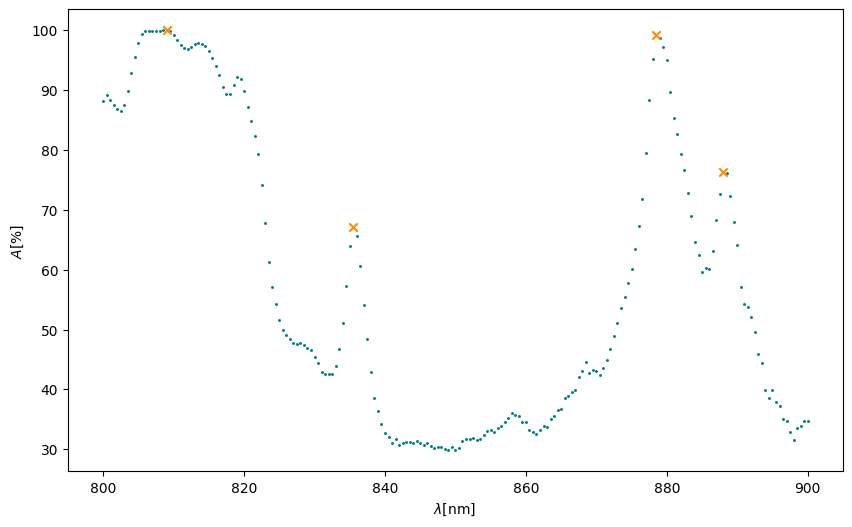

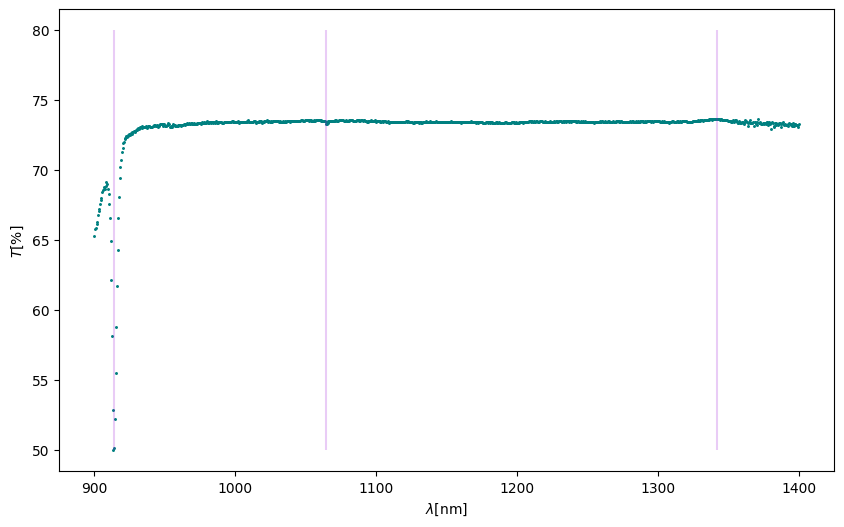

In [47]:
NdYVO_800_900 = sample_modry[sample_modry["Wavelength nm."].between(800, 900)]
absorpce_NdYVO = 100-NdYVO_800_900["T%"]

peaks, _ = signal.find_peaks(absorpce_NdYVO, prominence=(10, None))
for p in peaks:
    print(NdYVO_800_900["Wavelength nm."].iloc[[p]])

fwhm_peak_absorpce_NdYVO = signal.peak_widths(absorpce_NdYVO, peaks, rel_height=0.5)
vyska_peak_absorpce_NdYVO = signal.peak_prominences(absorpce_NdYVO, peaks)
print(f"sirka peaku = {fwhm_peak_absorpce_NdYVO[0]}")
print(f"vyska peaku = {vyska_peak_absorpce_NdYVO[0]}")

fig_peak_filtr_NdYVO = plt.figure(figsize=(10, 6))

plt.scatter(NdYVO_800_900["Wavelength nm."], absorpce_NdYVO, 
            color="teal", 
            marker=".", s=5, alpha=1)
for p in peaks:
    plt.scatter(NdYVO_800_900["Wavelength nm."].iloc[[p]], absorpce_NdYVO.iloc[[p]],
                marker="x", color="darkorange")
plt.xlabel('$\\lambda\\mathrm{[nm]}$ ', fontsize = 10)
plt.ylabel("$A\\mathrm{[\\%]}$", fontsize = 10)
plt.savefig("../protokol_05/img/absorpce_NdYVO.pdf")
plt.show()
    

NdYVO_las = sample_modry[sample_modry["Wavelength nm."].between(900, 1400)]
fig_NdYVO_las = plt.figure(figsize=(10, 6))

plt.scatter(NdYVO_las["Wavelength nm."], NdYVO_las["T%"], 
            color="teal", 
            marker=".", s=5, alpha=1)
plt.vlines(x=(914, 1064, 1342), ymin = 50, ymax=80, color = "darkviolet", alpha = 0.2)
plt.xlabel('$\\lambda\\mathrm{[nm]}$ ', fontsize = 10)
plt.ylabel("$T\\mathrm{[\\%]}$", fontsize = 10)
plt.savefig("../protokol_05/img/las_NdYVO.pdf")
plt.show()

Laserový krystal Er:sklo
* Určete polohu významných maxim absorpce v rozsahu 800 až 1000 nm. Které
z těchto maxim jsou využívány pro čerpání tohoto aktivního materiálu
prostřednictvím laserových diod?
* Odhadněte, jakou šířku generované spektrální čáry by měla mít laserová dioda,
kterou by bylo vhodné využít pro čerpání tohoto aktivního prostředí.
* Uveďte významné vlnové délky záření, které jsou generovány lasery s tímto
typem aktivního prostředí. Pozorujete pokles transmise na těchto vlnových
délkách a proč?
* Rozhodněte, zda se jedná o 3- nebo 4- hladinový energetický systém.

1415    907.5
Name: Wavelength nm., dtype: float64
1550    975.0
Name: Wavelength nm., dtype: float64
sirka peaku = [25.21084865 25.07796046]
vyska peaku = [15.504 59.251]


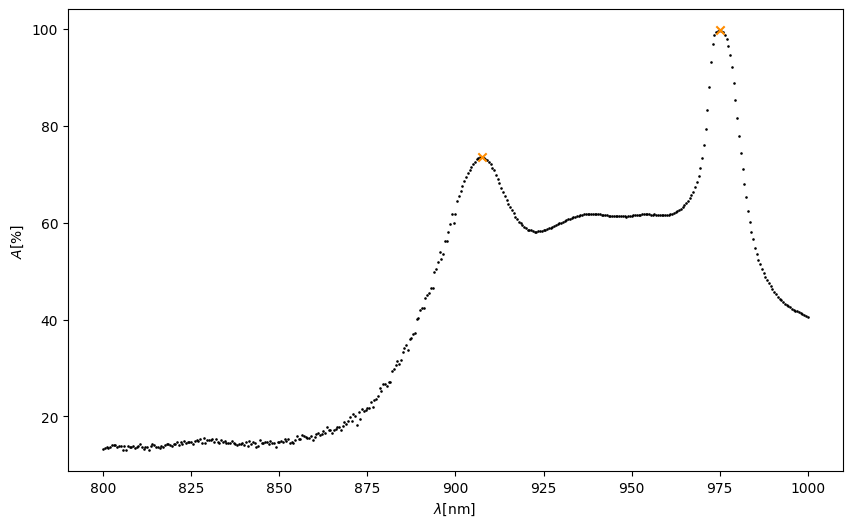

2402    1401.0
Name: Wavelength nm., dtype: float64
2404    1402.0
Name: Wavelength nm., dtype: float64
2411    1405.5
Name: Wavelength nm., dtype: float64
2415    1407.5
Name: Wavelength nm., dtype: float64
2420    1410.0
Name: Wavelength nm., dtype: float64
2429    1414.5
Name: Wavelength nm., dtype: float64
2448    1424.0
Name: Wavelength nm., dtype: float64
2458    1429.0
Name: Wavelength nm., dtype: float64
2469    1434.5
Name: Wavelength nm., dtype: float64
2476    1438.0
Name: Wavelength nm., dtype: float64
2543    1471.5
Name: Wavelength nm., dtype: float64
2580    1490.0
Name: Wavelength nm., dtype: float64
2671    1535.5
Name: Wavelength nm., dtype: float64
2687    1543.5
Name: Wavelength nm., dtype: float64
2794    1597.0
Name: Wavelength nm., dtype: float64


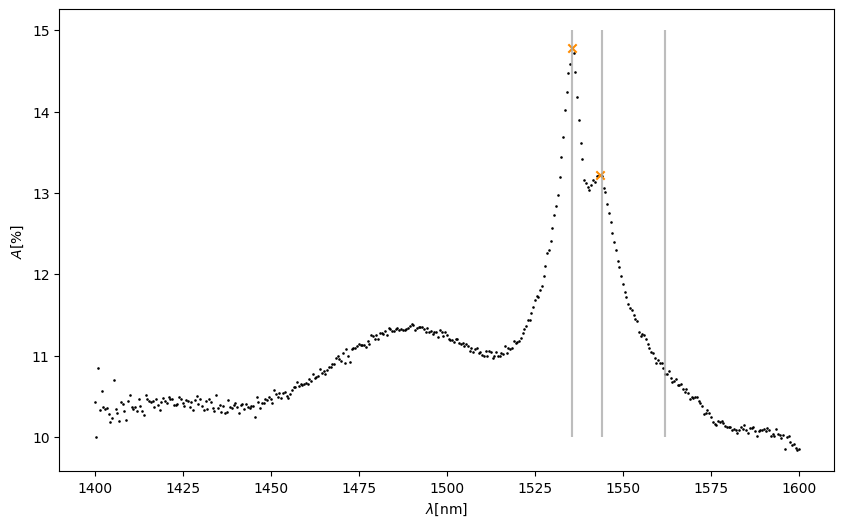

In [48]:
Er_sklo = sample_bily[sample_bily["Wavelength nm."].between(800, 1000)]
absorpce_Er_sklo = 100-Er_sklo["T%"]

peaks, _ = signal.find_peaks(absorpce_Er_sklo, prominence=(10, None))
for p in peaks:
    print(Er_sklo["Wavelength nm."].iloc[[p]])

fwhm_peak_absorpce_Er_sklo = signal.peak_widths(absorpce_Er_sklo, peaks, rel_height=0.5)
vyska_peak_absorpce_Er_sklo = signal.peak_prominences(absorpce_Er_sklo, peaks)
print(f"sirka peaku = {fwhm_peak_absorpce_Er_sklo[0]}")
print(f"vyska peaku = {vyska_peak_absorpce_Er_sklo[0]}")

fig_peak_filtr_Er_sklo = plt.figure(figsize=(10, 6))

plt.scatter(Er_sklo["Wavelength nm."], absorpce_Er_sklo, 
            color="black", 
            marker=".", s=3, alpha=1)
for p in peaks:
    plt.scatter(Er_sklo["Wavelength nm."].iloc[[p]], absorpce_Er_sklo.iloc[[p]],
                marker="x", color="darkorange")
plt.xlabel('$\\lambda\\mathrm{[nm]}$ ', fontsize = 10)
plt.ylabel("$A\\mathrm{[\\%]}$", fontsize = 10)
plt.savefig("../protokol_05/img/absorpce_Er_sklo.pdf")  
plt.show()

Er_sklo_las = sample_bily[sample_bily["Wavelength nm."].between(1400, 1600)]
absorpce_Er_sklo_las = 100-Er_sklo_las["T%"]

peaks, _ = signal.find_peaks(absorpce_Er_sklo_las, prominence=(0.15, None))
for p in peaks:
    print(Er_sklo_las["Wavelength nm."].iloc[[p]])


fig_Er_sklo_las = plt.figure(figsize=(10, 6))

plt.scatter(Er_sklo_las["Wavelength nm."], absorpce_Er_sklo_las, 
            color="black", 
            marker=".", s=3, alpha=1)
for p in peaks[-3:-1]:
    plt.scatter(Er_sklo_las["Wavelength nm."].iloc[[p]], absorpce_Er_sklo_las.iloc[[p]],
                marker="x", color="darkorange")
    plt.vlines(x=(1535.5, 1544, 1562), ymin = 10, ymax = 15, colors="darkgrey", alpha = 0.5)
plt.xlabel('$\\lambda\\mathrm{[nm]}$ ', fontsize = 10)
plt.ylabel("$A\\mathrm{[\\%]}$", fontsize = 10)
plt.savefig("../protokol_05/img/las_Er_sklo.pdf")
plt.show()


Krystal Cr:YAG
* Určete využití tohoto krystalu v laserové technice.
* Změřte tloušťku vzorku a spočtěte interní absorpční koeficient na vlnové délce λ =
1,06 μm. Při výpočtu nejprve odečtěte Fresnelovské ztráty na čelech krystalu.

In [49]:
n1 = 1.82
n2 = 1
fren = ((n1-n2)/(n1+n2))**2
l = 0.104
t = 49.117/100
a = - math.log((t+fren/1-fren)) / l

print(a)

6.836201720508846
